In [1]:
#import the various modules needed

import os                #for accessing the file system
from glob import glob    #for handling the image files as a whole
import cv2               #for image manipulation


import pandas as pd      #for handling the tabular data
import numpy as np       #for handling long arrays of data

from sklearn.model_selection import train_test_split #splitting of test and train data

In [2]:
#standard dimensions for the images
img_width, img_height = 128, 128

files = sorted(glob('./head_ct/*.png'))
labels = pd.read_csv('./labels.csv')[' hemorrhage'].tolist()
images = np.empty((len(files), img_width, img_height))

for i, _file in enumerate(files):
    images[i, :, :] = cv2.resize(cv2.imread(_file, 0), (img_width, img_height))

print('Files loaded successfully !')

Files loaded successfully !


In [3]:
os.listdir()

['.ipynb_checkpoints', 'analysis.ipynb', 'head_ct', 'labels.csv']

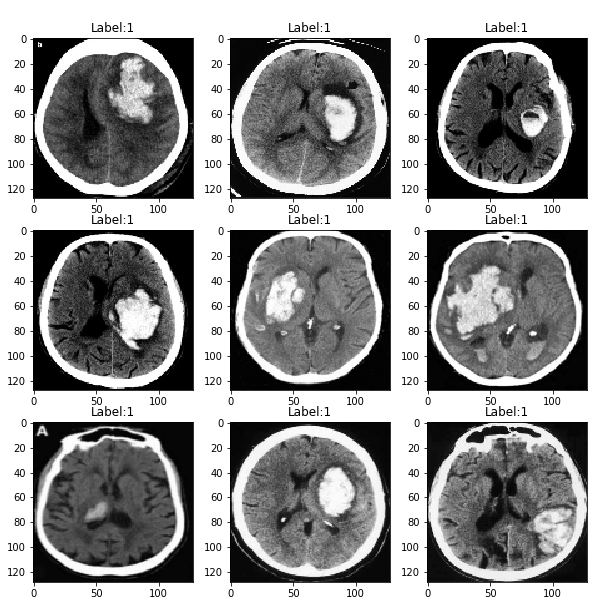

In [22]:
#Let's take a look at the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.title("\nLabel:{}".format(labels[i]))
# show the plot
plt.show()

In [5]:
#Now we split the dataset into train (80%), validation (10%) and test (10%) sets... since those are the conventional divisions 
#so that the after the training and validation are done, the quality of our model can be verified by a testing set of data
#which ideally should be new data, i.e data that is generated in the real world while implementing the algo.

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=1)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=1)

print((len(train_images), len(val_images), len(test_images)))

(160, 20, 20)


In [6]:
import tensorflow as tf

In [7]:
tf.__version__

'2.0.0-rc0'

In [8]:
#let's now start building our Neural Network by first of all importing the modules n functions that'll used later.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import backend as K 

Using TensorFlow backend.


In [9]:
input_shape = (img_width, img_height, 1)

#initialising my model
from tensorflow.keras.models import Sequential
my_model = Sequential()    

In [10]:
my_model

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

my_model.add(Conv2D(32, (3, 3), input_shape=input_shape))
my_model.add(Activation('relu'))

#We then add a MaxPool layer, which will reduce the size of the output of the first conv layer in 75%.
#This is performed to avoid an exagerated increase in the number of parameters of the network.

my_model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#We will add more convolutional layers, followed by MaxPool layers

my_model.add(Conv2D(32, (3, 3)))
my_model.add(Activation('relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))

my_model.add(Conv2D(64, (3, 3)))
my_model.add(Activation('relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2)))

#Finally, we will add two dense layers, or 'Fully Connected Layers'.
#These layers are classical neural nets, without convolutions.

my_model.add(Flatten())
my_model.add(Dense(64))
my_model.add(Activation('relu'))

#Dropout is an overfitting reduction technique.

my_model.add(Dropout(0.5))

#Now, we will set the output o the network.
#The Dense function has the argument "1" because the net output is the hematoma x non-hematoma classification

my_model.add(Dense(1))

#The output is either 0 or 1 and this can be obtained with a sigmoid function.

my_model.add(Activation('sigmoid'))

In [13]:
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

In [14]:
#Let's compile the network.

my_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
nb_train_samples = len(train_images)
nb_validation_samples = len(val_images)
epochs = 100
batch_size = 10

In [16]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.0,
    zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [17]:
# this is the augmentation configuration we will use for validation:
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(
    train_images[..., np.newaxis],
    train_labels,
    batch_size=batch_size)

validation_generator = val_datagen.flow(
    val_images[..., np.newaxis],
    val_labels,
    batch_size=batch_size)

In [18]:
history = my_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
16/16 [==============================] - 6s 387ms/step - loss: 0.6953 - accuracy: 0.5562 - val_loss: 0.6987 - val_accuracy: 0.3000
Epoch 2/100
16/16 [==============================] - 6s 373ms/step - loss: 0.7012 - accuracy: 0.4625 - val_loss: 0.6913 - val_accuracy: 0.4500
Epoch 3/100
16/16 [==============================] - 6s 351ms/step - loss: 0.7039 - accuracy: 0.5312 - val_loss: 0.6658 - val_accuracy: 0.8500
Epoch 4/100
16/16 [==============================] - 6s 348ms/step - loss: 0.6980 - accuracy: 0.6250 - val_loss: 0.7516 - val_accuracy: 0.3500
Epoch 5/100
16/16 [==============================] - 6s 382ms/step - loss: 0.6818 - accuracy: 0.6250 - val_loss: 0.5791 - val_accuracy: 0.7500
Epoch 6/100
16/16 [==============================] - 6s 358ms/step - loss: 0.6216 - accuracy: 0.6938 - val_loss: 0.6353 - val_accuracy: 0.7000
Epoch 7/100
16/16 [=============================

16/16 [==============================] - 6s 350ms/step - loss: 0.2464 - accuracy: 0.8938 - val_loss: 0.2083 - val_accuracy: 0.9000
Epoch 56/100
16/16 [==============================] - 6s 350ms/step - loss: 0.1778 - accuracy: 0.9250 - val_loss: 0.0850 - val_accuracy: 1.0000
Epoch 57/100
16/16 [==============================] - 6s 366ms/step - loss: 0.1311 - accuracy: 0.9438 - val_loss: 0.2327 - val_accuracy: 0.9000
Epoch 58/100
16/16 [==============================] - 6s 362ms/step - loss: 0.2320 - accuracy: 0.8875 - val_loss: 0.2358 - val_accuracy: 0.8000
Epoch 59/100
16/16 [==============================] - 5s 338ms/step - loss: 0.2112 - accuracy: 0.9375 - val_loss: 0.6406 - val_accuracy: 0.9000
Epoch 60/100
16/16 [==============================] - 5s 335ms/step - loss: 0.2029 - accuracy: 0.9062 - val_loss: 0.1116 - val_accuracy: 1.0000
Epoch 61/100
16/16 [==============================] - 6s 348ms/step - loss: 0.2345 - accuracy: 0.9187 - val_loss: 0.2083 - val_accuracy: 0.9000
Epoch

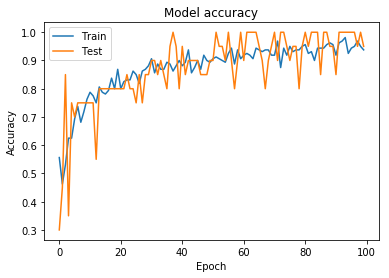

In [44]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()




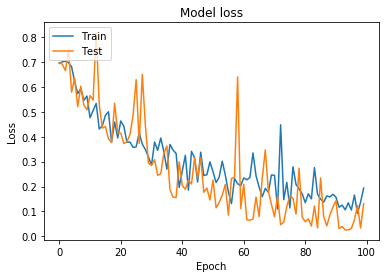

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
print("Accuracy: " + str(my_model.evaluate(test_images[..., np.newaxis] / 255., test_labels) * 100)[1] + "%")


ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})